In [71]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
import tqdm



%matplotlib inline

In [72]:
data = pd.read_csv('data_per_hour.csv', index_col=['Time'], 
                  parse_dates=['Time'])
#currency = pd.read_csv('data_preprocessed_lr.csv', index_col=['Time'], 
  #                     parse_dates=['Time'])

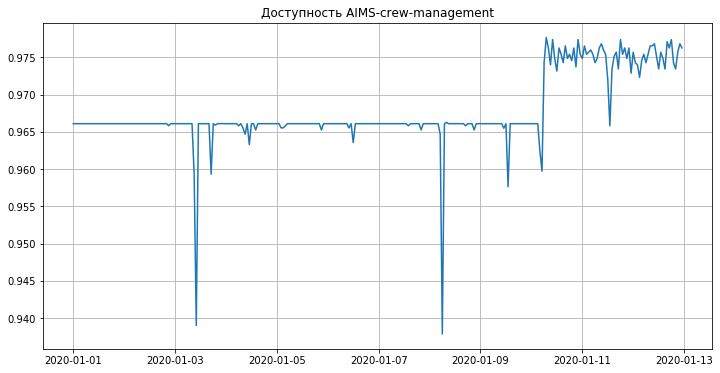

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(data.Summary)
plt.title('Доступность AIMS-crew-management')
plt.grid(True)
plt.show()

In [74]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Скользящие Окна

In [75]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [76]:
moving_average(data, 24)

0.9752471751412429

In [77]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [78]:
w = 1
rolling_mean = data.rolling(window=w).mean()
rolling_mean - data[w:]
mean_absolute_percentage_error(rolling_mean, data[w:])

Summary    2.024040e-14
dtype: float64

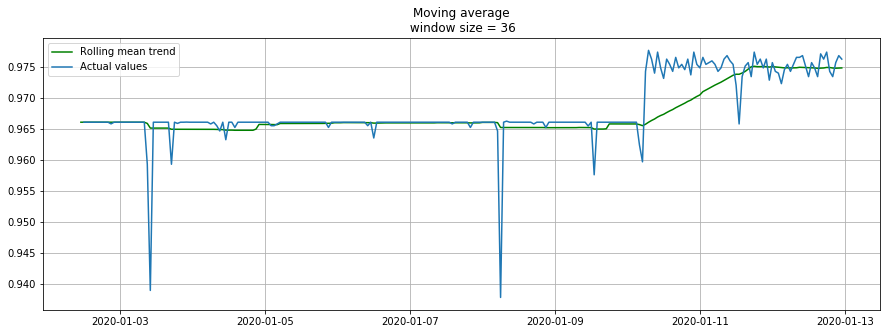

In [79]:
plotMovingAverage(data, 36) 

In [98]:
#s = np.random.normal(1, 0.1, data.shape[0])
s = [i]

In [99]:
#data['WAV'] = data['Summary']*(0.5+np.random.random(size=data.shape[0]))
data['WAV'] = data['Summary']*s

In [100]:
data

,Summary,WAV
Time,,
2020-01-01 00:00:00,0.966102,0.854054
2020-01-01 01:00:00,0.966102,1.030911
2020-01-01 02:00:00,0.966102,0.991561
2020-01-01 03:00:00,0.966102,0.771595
2020-01-01 04:00:00,0.966102,0.975994
...,...,...
2020-01-12 19:00:00,0.974294,1.070911
2020-01-12 20:00:00,0.973446,1.067431
2020-01-12 21:00:00,0.975706,1.173505


In [101]:
def plotWeightedAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):
    w_series = series['WAV']
    a_series = series['Summary']
    rolling_mean = w_series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    plt.plot(a_series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

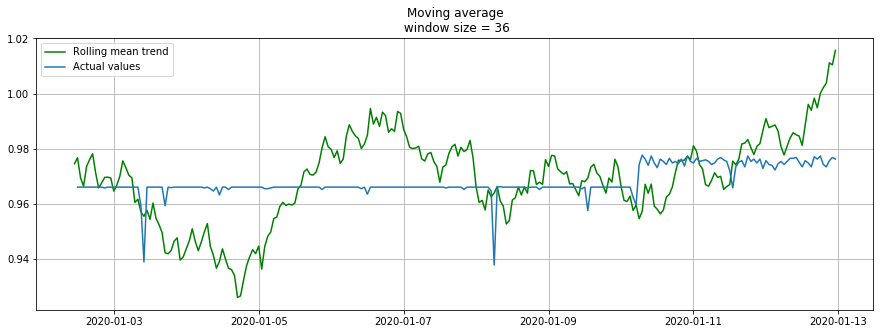

In [102]:
plotWeightedAverage(data, 36) 


# AR

In [108]:
data2 = pd.read_csv('data_per_hour.csv', index_col=['Time'], 
                  parse_dates=['Time'])

In [109]:
from statsmodels.tsa.ar_model import AR
#from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = AR(data2)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data2), len(data2))
print(yhat)

2020-01-13    0.975842
Freq: H, dtype: float64


In [122]:
data[:int(len(data) * 0.7)]['Summary']

Time
2020-01-01 00:00:00    0.966102
2020-01-01 01:00:00    0.966102
2020-01-01 02:00:00    0.966102
2020-01-01 03:00:00    0.966102
2020-01-01 04:00:00    0.966102
                         ...   
2020-01-09 04:00:00    0.966102
2020-01-09 05:00:00    0.966102
2020-01-09 06:00:00    0.966102
2020-01-09 07:00:00    0.966102
2020-01-09 08:00:00    0.966102
Name: Summary, Length: 201, dtype: float64

In [131]:
from matplotlib import pyplot
test_split = int(len(data) * 0.7)
train = data[:test_split]['Summary']
test = data[test_split:]['Summary']
# train autoregression
model = AR(train)
model
'''window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()'''

"window = model_fit.k_ar\ncoef = model_fit.params\n# walk forward over time steps in test\nhistory = train[len(train)-window:]\nhistory = [history[i] for i in range(len(history))]\npredictions = list()\nfor t in range(len(test)):\n    length = len(history)\n    lag = [history[i] for i in range(length-window,length)]\n    yhat = coef[0]\n    for d in range(window):\n        yhat += coef[d+1] * lag[window-d-1]\n    obs = test[t]\n    predictions.append(yhat)\n    history.append(obs)\n    print('predicted=%f, expected=%f' % (yhat, obs))\nerror = mean_squared_error(test, predictions)\nprint('Test MSE: %.3f' % error)\n# plot\npyplot.plot(test)\npyplot.plot(predictions, color='red')\npyplot.show()"

## SARIMAX

In [5]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

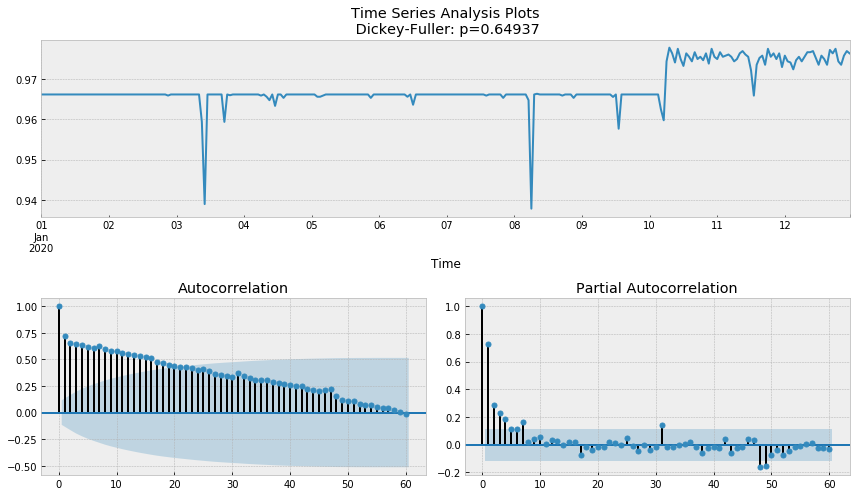

In [6]:
tsplot(data.Summary, lags=60)

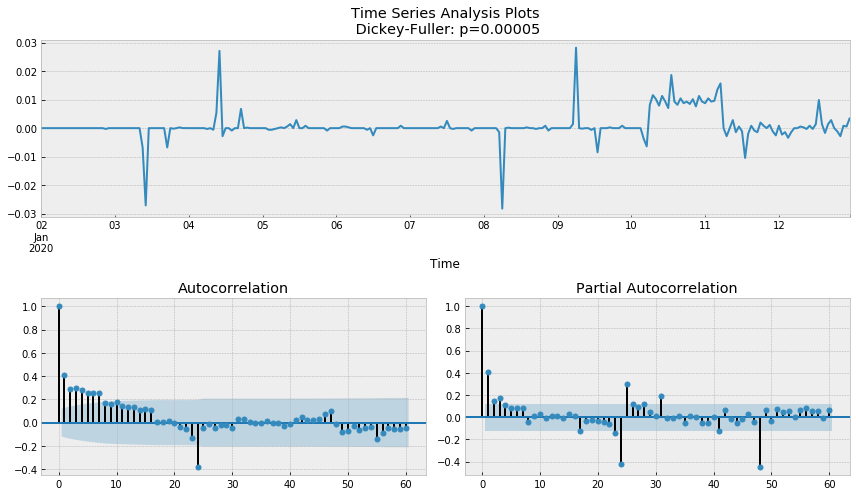

In [7]:
data_diff = data.Summary - data.Summary.shift(24)
tsplot(data_diff[24:], lags=60)

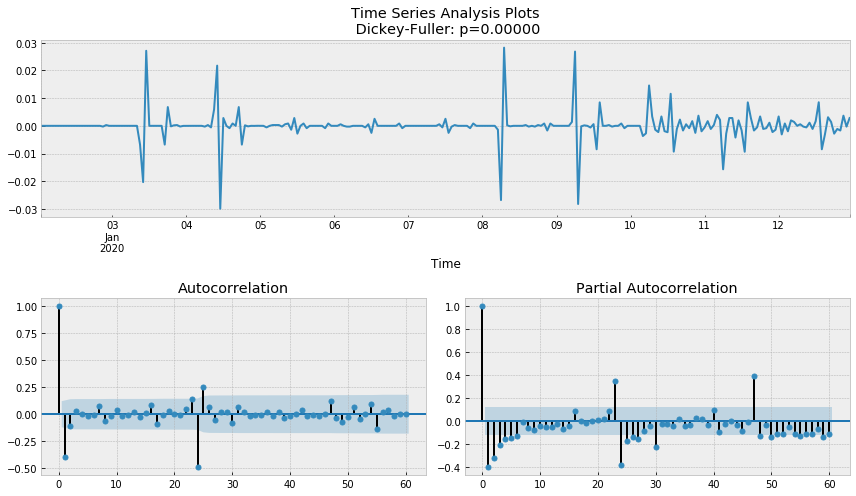

In [8]:
data_diff = data_diff - data_diff.shift(1)
tsplot(data_diff[24+1:], lags=60)

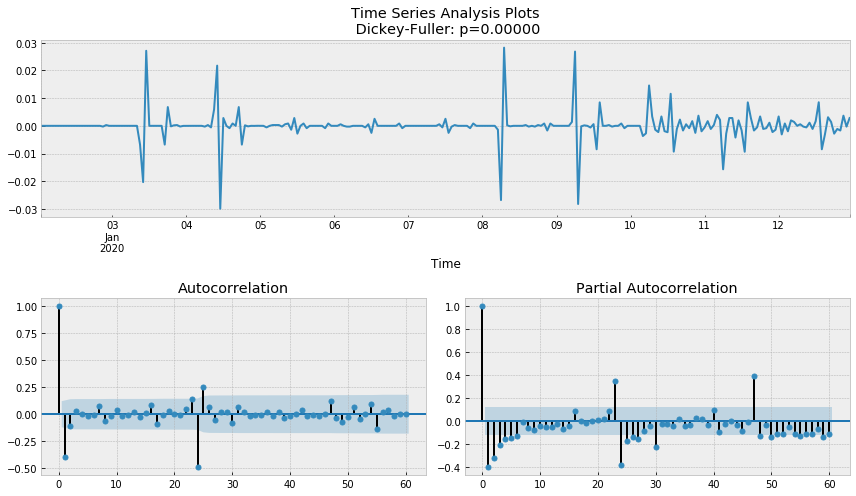

In [9]:
tsplot(data_diff[24+1:], lags=60)

- $p$ is most probably 4 since it is the last significant lag on the PACF, after which, most others are not significant. 
- $d$ equals 1 because we had first differences
- $q$ should be somewhere around 4 as well as seen on the ACF
- $P$ might be 2, since 24-th and 48-th lags are somewhat significant on the PACF
- $D$ again equals 1 because we performed seasonal differentiation
- $Q$ is probably 1. The 24-th lag on ACF is significant while the 48-th is not.

Let's test various models and see which one is better.

In [10]:
# setting initial values and some bounds for them
ps = range(1, 3)
d = 1 
qs = range(1, 3)
Ps = range(1, 4)
D = 1 
Qs = range(1, 4)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [11]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [12]:
from tqdm import tqdm

In [13]:
%%time
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.Summary, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 2)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]C:\Users\stass\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
  3%|██▎                                                                                | 1/36 [00:01<00:58,  1.67s/it]C:\Users\stass\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
  6%|████▌                                                                              | 2/36 [00:02<00:45,  1.35s/it]C:\Users\stass\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
  8%|██████▉                                        

      parameters          aic
0   (1, 1, 1, 1) -2493.965159
3   (1, 1, 2, 1) -2493.650462
19  (2, 1, 1, 2) -2489.636023
9   (1, 2, 1, 1) -2488.020126
25  (2, 1, 3, 2) -2487.887661
Wall time: 1min 23s


In [14]:
result_table.head()

,parameters,aic
0,"(1, 1, 1, 1)",-2493.965159
1,"(1, 1, 1, 2)",-2447.236784
2,"(1, 1, 1, 3)",-2478.245675
3,"(1, 1, 2, 1)",-2493.650462
4,"(1, 1, 2, 2)",-2464.570913


In [15]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(data.Summary, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

C:\Users\stass\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                            Summary   No. Observations:                  288
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                1116.657
Date:                            Thu, 06 Feb 2020   AIC                          -2223.313
Time:                                    12:23:03   BIC                          -2205.453
Sample:                                01-01-2020   HQIC                         -2216.136
                                     - 01-12-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1962      0.078      2.506      0.012       0.043       0.350
ma.L1         -0.7925      0.072   

Let's inspect the residuals of the model.

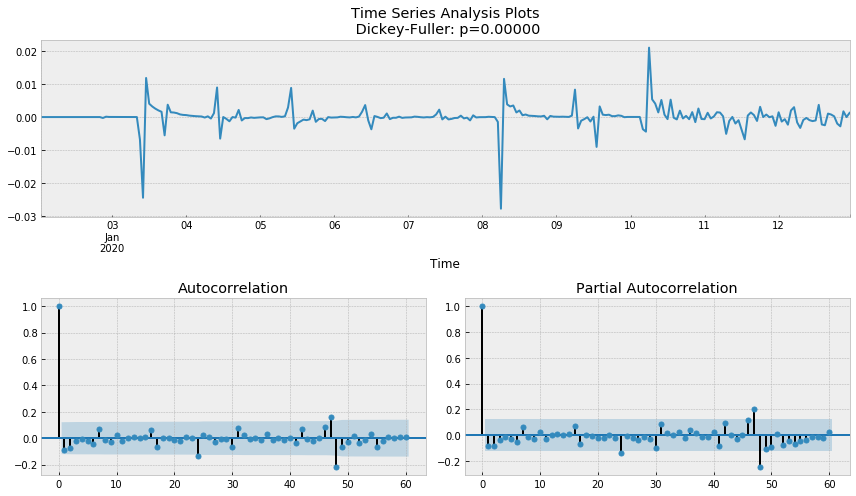

In [16]:
tsplot(best_model.resid[24+1:], lags=60)

It is clear that the residuals are stationary, and there are no apparent autocorrelations. Let's make predictions using our model.

In [17]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

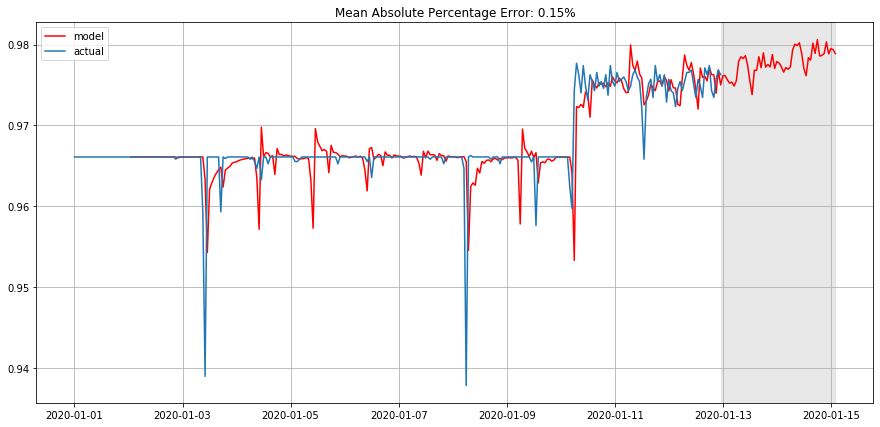

In [18]:
plotSARIMA(data, best_model, 50)